In [11]:
import xmitgcm as xm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.mlab as mlab

In [34]:
ds = xm.open_mdsdataset('ChanPar04Data/',read_grid=False,prefix={'T'},nz=6,endian='<')
ds = ds.isel(k=0)
dx = .2002 # km

In [35]:
ds

<xarray.Dataset>
Dimensions:  (i: 4096, i_g: 4096, j: 128, j_g: 128, k_l: 6, k_p1: 7, k_u: 6, time: 33)
Coordinates:
  * k_p1     (k_p1) int64 0 1 2 3 4 5 6
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    k        int64 0
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * k_u      (k_u) int64 0 1 2 3 4 5
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * k_l      (k_l) int64 0 1 2 3 4 5
    iter     (time) int64 0 36000 72000 108000 144000 180000 216000 252000 ...
  * time     (time) int64 0 36000 72000 108000 144000 180000 216000 252000 ...
Data variables:
    T        (time, j, i) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [47]:
nt = 33
ny = 128
nfft = 2024
pp = np.zeros((nt,nfft/2+1))
for t in range(nt):
    ppp = 0.
    for j in range(ny):
        p,f=mlab.psd(ds['T'][t,j,:],NFFT=nfft,Fs=1./dx,detrend='mean')
        ppp+=p/ny
        #print(len(ppp))
    pp[t,:]=ppp
    

In [48]:
ds['T'][t,j,:].values

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

<IPython.core.display.Javascript object>


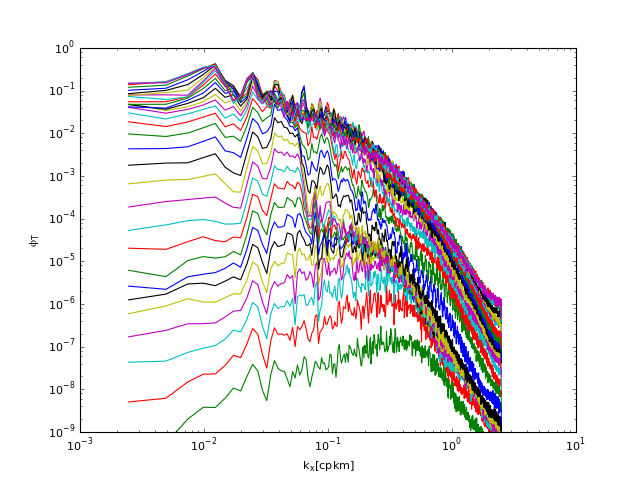

(1e-09, 1)

In [51]:
fig,ax=plt.subplots()
ax.loglog(f,pp.T)
ax.set_ylabel('$\phi_T$')
ax.set_xlabel('$k_x [cpkm]$')
ax.set_ylim([1e-9,1])

In [26]:
pp

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])